<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-For-Light-Curve-Visualizations" data-toc-modified-id="Notebook-For-Light-Curve-Visualizations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook For Light Curve Visualizations</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Description-of-the-Metadata:" data-toc-modified-id="Description-of-the-Metadata:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Description of the Metadata:</a></span><ul class="toc-item"><li><span><a href="#Galactic-coordinates" data-toc-modified-id="Galactic-coordinates-1.0.1.1"><span class="toc-item-num">1.0.1.1&nbsp;&nbsp;</span>Galactic coordinates</a></span></li><li><span><a href="#Redshift" data-toc-modified-id="Redshift-1.0.1.2"><span class="toc-item-num">1.0.1.2&nbsp;&nbsp;</span>Redshift</a></span></li><li><span><a href="#Luminosity-Distance" data-toc-modified-id="Luminosity-Distance-1.0.1.3"><span class="toc-item-num">1.0.1.3&nbsp;&nbsp;</span>Luminosity Distance</a></span></li><li><span><a href="#Dust" data-toc-modified-id="Dust-1.0.1.4"><span class="toc-item-num">1.0.1.4&nbsp;&nbsp;</span>Dust</a></span></li></ul></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Data Processing</a></span></li><li><span><a href="#Class-Distribution" data-toc-modified-id="Class-Distribution-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Class Distribution</a></span></li><li><span><a href="#FEATURE-EXPLORATION" data-toc-modified-id="FEATURE-EXPLORATION-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>FEATURE EXPLORATION</a></span></li><li><span><a href="#Classes" data-toc-modified-id="Classes-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Classes</a></span></li></ul></li></ul></li><li><span><a href="#Resources" data-toc-modified-id="Resources-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Resources</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Useful-Packages-for-Astrophysics---particularly-feature-extraction" data-toc-modified-id="Useful-Packages-for-Astrophysics---particularly-feature-extraction-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Useful Packages for Astrophysics - particularly feature extraction</a></span></li><li><span><a href="#External-Data-Sources" data-toc-modified-id="External-Data-Sources-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>External Data Sources</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Notebook For Light Curve Visualizations

In [17]:
# You can edit the font size here to make rendered text more comfortable to read
# It was built on a 13" retina screen with 18px
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 18px; }</style>"))

In [18]:
import os
import numpy as np
import scipy.stats as spstat
import matplotlib.pyplot as plt
from collections import OrderedDict

%matplotlib inline

from gatspy.periodic import LombScargleMultiband


In [19]:
%matplotlib notebook

import os
from collections import Counter, OrderedDict
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
from astropy.table import Table
import schwimmbad
from cesium.time_series import TimeSeries
import cesium.featurize as featurize
from tqdm import tnrange, tqdm_notebook
import sklearn 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [20]:
pbmap = OrderedDict([(0,'u'), (1,'g'), (2,'r'), (3,'i'), (4, 'z'), (5, 'y')])

# it also helps to have passbands associated with a color
pbcols = OrderedDict([(0,'blueviolet'), (1,'green'), (2,'red'),\
                      (3,'orange'), (4, 'black'), (5, 'brown')])

pbnames = list(pbmap.values())
pbnames

['u', 'g', 'r', 'i', 'z', 'y']

Next, we'll read the metadata table.

In [21]:
datadir = 'data/'
metafilename = f'{datadir}/training_set_metadata.csv'
metadata = Table.read(metafilename, format='csv')
nobjects = len(metadata)
metadata

object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64
615,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,nan,0.017,92
713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
730,33.574219,-6.579593,170.455585,-61.548219,1,0.232,0.2262,0.0157,40.2561,0.021,42
745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
1227,35.683594,-5.379379,171.992947,-59.253501,1,0.0,0.0,0.0,nan,0.02,65
1598,347.84671,-64.760857,318.929827,-49.143596,1,0.1352,0.182,0.0304,39.7279,0.019,90
1632,348.595886,-63.07262,320.023289,-50.71306,1,0.6857,0.7014,0.01,43.1524,0.021,42
1920,149.414062,3.433834,234.919132,42.24555,1,0.3088,0.3229,0.336,41.1401,0.027,90


In [22]:
# identifying supernova Object id

metadata_sn = metadata[metadata['target'] == 90]
metadata_sn


object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64
745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
1598,347.84671,-64.760857,318.929827,-49.143596,1,0.1352,0.182,0.0304,39.7279,0.019,90
1920,149.414062,3.433834,234.919132,42.24555,1,0.3088,0.3229,0.336,41.1401,0.027,90
2072,0.965665,-46.37508,325.845907,-68.579427,1,0.1516,0.19,0.0104,39.8317,0.007,90
2330,359.805206,-46.768478,327.135979,-67.829903,1,0.4541,0.5736,0.2827,42.6207,0.011,90
4389,151.699219,3.583322,236.533224,44.205648,1,0.2333,0.2205,0.9667,40.1939,0.016,90
4595,349.615387,-63.636005,318.927246,-50.506542,1,0.5919,0.5995,0.0127,42.737,0.018,90
4819,35.332031,-5.979157,172.286722,-59.931743,1,0.3053,0.287,0.0076,40.8445,0.022,90


### Class Distribution
There's many potential choices for classifiers but for now we'll leave everything together.

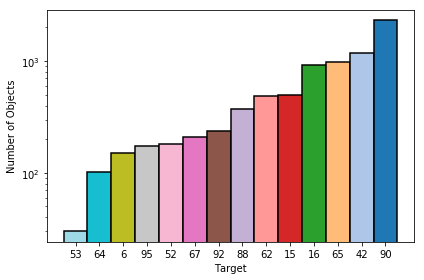

In [24]:
counts = Counter(metadata['target'])
labels, values = zip(*sorted(counts.items(), key=itemgetter(1)))
%matplotlib inline
fig, ax = plt.subplots()

cmap = plt.cm.tab20
nlines = len(labels)
classcolor =  list(cmap(np.linspace(0,1,nlines)))[::-1]

# we'll create a mapping between class and color
classcolmap = dict(zip(labels, classcolor))

indexes = np.arange(nlines)
width = 1
ax.bar(indexes, values, width, edgecolor='k',\
       linewidth=1.5, tick_label=labels, log=True, color=classcolor)
ax.set_xlabel('Target')
ax.set_ylabel('Number of Objects')
fig.tight_layout()

You can see the class distribution in the training set is imbalanced. This reflects reality. The Universe doesn't produce all kinds of events at equal rates, and even if it did, some events are fainter than others, so we'd naturally find fewer of them than bright events.

Next, we'll read the light curve data. All the objects in the training set are in a single file:

In [25]:
lcfilename = f'{datadir}/training_set.csv'
lcdata = Table.read(lcfilename, format='csv')
lcdata

object_id,mjd,passband,flux,flux_err,detected
int64,float64,int64,float64,float64,int64
615,59750.4229,2,-544.810303,3.622952,1
615,59750.4306,1,-816.434326,5.55337,1
615,59750.4383,3,-471.385529,3.801213,1
615,59750.445,4,-388.984985,11.395031,1
615,59752.407,2,-681.858887,4.041204,1
615,59752.4147,1,-1061.457031,6.472994,1
615,59752.4224,3,-524.95459,3.552751,1
615,59752.4334,4,-393.480225,3.599346,1
615,59752.4435,5,-355.88678,10.421921,1


In [32]:
# around 2313 sn in the training set.
# 745, 1124

lcdata_sn = lcdata[lcdata['object_id'] == 4445796]

lcdata_sn

object_id,mjd,passband,flux,flux_err,detected
int64,float64,int64,float64,float64,int64
4445796,59583.1206,0,-13.960978,7.004761,0
4445796,59588.0386,5,46.44173,40.535366,0
4445796,59589.0363,5,37.528587,31.272087,0
4445796,59591.0561,4,3.765764,8.999254,0
4445796,59597.0926,5,-17.244801,19.587275,0
4445796,59598.1297,4,6.450018,16.590387,0
4445796,59624.0302,4,1.760579,15.07069,0
4445796,59630.0324,5,-9.525039,9.445808,0
4445796,59634.0867,2,-10.054203,4.272368,0


### FEATURE EXPLORATION

In [27]:
# read a sample object data
# obj_id = train['object_id'][0]
# fluxDF = train[train['object_id'] == obj_id]
# fluxDF

# amplitude,
# percent_beyond_3_std,
# maximum,
# max_slope,
# median,
# median_absolute_deviation,
# percent_close_to_median,
# minimum


In [35]:
class LightCurve(object):
    '''Light curve object for PLAsTiCC formatted data'''
    
    _passbands = OrderedDict([(0,'C4'),\
                              (1,'C2'),\
                              (2,'C3'),\
                              (3,'C1'),\
                              (4,'k'),\
                              (5,'C5')])
    
    _pbnames = ['u','g','r','i','z','y']
    
    #def __init__(self, filename):
    def __init__(self, fluxDF):
        '''Read in light curve data'''

        #self.DFlc     = Table.read(filename, format='ascii.csv')
        self.DFlc     = fluxDF
        #self.filename = filename.replace('.csv','')
        self._finalize()
     
    # this is some simple code to demonstrate how to calculate features on these multiband light curves
    # we're not suggesting using these features specifically
    # there also might be additional pre-processing you do before computing anything
    # it's purely for illustration
    def _finalize(self):
        '''Store individual passband fluxes as object attributes'''
        # in this example, we'll use the weighted mean to normalize the features
        weighted_mean = lambda flux, dflux: np.sum(flux*(flux/dflux)**2)/np.sum((flux/dflux)**2)
        
        # define some functions to compute simple descriptive statistics
        normalized_flux_std = lambda flux, wMeanFlux: np.std(flux/wMeanFlux, ddof = 1)
        normalized_amplitude = lambda flux, wMeanFlux: (np.max(flux) - np.min(flux))/wMeanFlux
        normalized_MAD = lambda flux, wMeanFlux: np.median(np.abs((flux - np.median(flux))/wMeanFlux))
        beyond_1std = lambda flux, wMeanFlux: sum(np.abs(flux - wMeanFlux) > np.std(flux, ddof = 1))/len(flux)
        
        for pb in self._passbands:
            ind = self.DFlc['passband'] == pb
            pbname = self._pbnames[pb]
            
            if len(self.DFlc[ind]) == 0:
                setattr(self, f'{pbname}Std', np.nan)
                setattr(self, f'{pbname}Amp', np.nan)
                setattr(self, f'{pbname}MAD', np.nan)
                setattr(self, f'{pbname}Beyond', np.nan)
                setattr(self, f'{pbname}Skew', np.nan)
                continue
            
            f  = self.DFlc['flux'][ind]
            df = self.DFlc['flux_err'][ind]
            m  = weighted_mean(f, df)
            
            # we'll save the measurements in each passband to simplify access.
            setattr(self, f'{pbname}Flux', f)
            setattr(self, f'{pbname}FluxUnc', df)
            setattr(self, f'{pbname}Mean', m)
            
            # compute the features
            std = normalized_flux_std(f, df)
            amp = normalized_amplitude(f, m)
            mad = normalized_MAD(f, m)
            beyond = beyond_1std(f, m)
            skew = spstat.skew(f) 
            
            # and save the features
            setattr(self, f'{pbname}Std', std)
            setattr(self, f'{pbname}Amp', amp)
            setattr(self, f'{pbname}MAD', mad)
            setattr(self, f'{pbname}Beyond', beyond)
            setattr(self, f'{pbname}Skew', skew)
        
        # we can also construct features between passbands
        pbs = list(self._passbands.keys())
        for i, lpb in enumerate(pbs[0:-1]):
            rpb = pbs[i+1]
            
            lpbname = self._pbnames[lpb]
            rpbname = self._pbnames[rpb]
            
            colname = '{}Minus{}'.format(lpbname, rpbname.upper())
            lMean = getattr(self, f'{lpbname}Mean', np.nan)
            rMean = getattr(self, f'{rpbname}Mean', np.nan)
            col = -2.5*np.log10(lMean/rMean) if lMean> 0 and rMean > 0 else -999
            setattr(self, colname, col)
    
    def plot_multicolor_lc(self, target_id=None):
        '''Plot the multiband light curve'''
        
        # Lomb-Scargle
        model = LombScargleMultiband(fit_period=True)
        # we'll window the search range by setting minimums and maximums here
        # but in general, the search range you want to evaluate will depend on the data
        # and you will not be able to window like this unless you know something about
        # the class of the object a priori
        t_min = max(np.median(np.diff(sorted(self.DFlc['mjd']))), 0.1)
        t_max = min(10., (self.DFlc['mjd'].max() - self.DFlc['mjd'].min())/2.)
        
        model.optimizer.set(period_range=(t_min, t_max), first_pass_coverage=5)
        model.fit(self.DFlc['mjd'], self.DFlc['flux'], dy=self.DFlc['flux_err'], filts=self.DFlc['passband'])
        period = model.best_period
        obj_id = self.DFlc['object_id'][0] # object ID
        print(f'object ID: {obj_id} has a period of {period} days')
        
        phase = (self.DFlc['mjd'] /period) % 1
        
#         fig, axes = plt.subplots(3, 2, figsize=(16,12))
        
        fig, ax = plt.subplots(figsize=(16,12))
#         fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(16,6))

        #if phase is None:
        #    phase = []
        #if len(phase) != len(self.DFlc):
        #    phase = self.DFlc['mjd']
        #    xlabel = 'MJD'
        #else:
        #    xlabel = 'Phase'
          
        for i, pb in enumerate(self._passbands):
#             ax = axes[i // 2, i % 2]
            pbname = self._pbnames[pb]
            print(pbname)
            ind = self.DFlc['passband'] == pb
            if len(self.DFlc[ind]) == 0:
                continue
            # errorbar: plot y versus x as lines and/or markers with attached errorbars
            #ax.errorbar(phase[ind], 
            #         self.DFlc['flux'][ind],
            #         self.DFlc['flux_err'][ind],
            #         fmt = 'o', color = self._passbands[pb], label = f'{pbname}')
            time = self.DFlc['mjd'][ind]
            flux = self.DFlc['flux'][ind]
            ax.errorbar(time, 
                     flux,
                     self.DFlc['flux_err'][ind],
                     fmt = 'o', color = self._passbands[pb], label = f'{pbname}')
            
#             the reason for fit line 
            fit = lightcurve_fit(time, flux)
            stime = np.arange(time.min(), time.max())
            ax.plot(stime, bazin(stime - stime.min(), *fit))
           
            ax.set_xlabel('MJD')
            ax.set_ylabel('flux')
            ax.set_title(pbname+'-band')
#             ax2.errorbar(phase[ind], 
#                      self.DFlc['flux'][ind],
#                      self.DFlc['flux_err'][ind],
#                      fmt = 'o', color = self._passbands[pb], label = f'{pbname}')
        ax.legend(ncol = 4, frameon = True)
        #ax.set_xlabel(f'{xlabel}', fontsize='large')
        ax.set_xlabel('MJD', fontsize='large')
        ax.set_ylabel('Flux', fontsize='large')
#         ax2.legend(ncol = 4, frameon = True)
#         ax2.set_xlabel('Phase', fontsize='large')
#         ax2.set_ylabel('Flux', fontsize='large')
        #fig.suptitle(self.filename, fontsize='x-large')
        fig.suptitle('object ID: ' + str(self.DFlc['object_id'][0]), fontsize='x-large') # graph title = object ID
        fig.tight_layout(rect=[0, 0, 1, 0.97])
    
    def get_features(self):
        '''Return all the features for this object'''
        variables = ['Std', 'Amp', 'MAD', 'Beyond', 'Skew']
        feats = []
        for i, pb in enumerate(self._passbands):
            pbname = self._pbnames[pb]
            feats += [getattr(self, f'{pbname}{x}', np.nan) for x in variables]
        return feats

In [36]:
# STARTER KIT
def bazin(time, A, B, t0, tfall, trise):
    X = np.exp(-(time - t0) / tfall) / (1 + np.exp((time - t0) / trise))
    return A * X + B


In [39]:
# STARTER KIT
from scipy.optimize import least_squares

def lightcurve_fit(time, flux):
    scaled_time = time - time.min()
    t0 = scaled_time[flux.argmax()]
    guess = (0, 0, t0, 40, -5)

    errfunc = lambda params: abs(flux - bazin(scaled_time, *params))

    result = least_squares(errfunc, guess, method='lm')

    return result.x


In [30]:
# def plot_lightcurves_with_fit(idx):
#     fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))
#     for id_f, f in enumerate(DES_FILTERS):
#         ax = axes[id_f // 2, id_f % 2]
        
#         time = X.iloc[idx]['mjd_%s' % f]
#         flux = X.iloc[idx]['fluxcal_%s' % f]
        
#         fit = lightcurve_fit(time, flux)
#         stime = np.arange(time.min(), time.max())
        
#         ax.plot(time, flux, 'o')
#         ax.plot(stime, bazin(stime - stime.min(), *fit))
#         ax.set_xlabel('MJD')
#         ax.set_ylabel('Calibrated flux')
#         ax.set_title('%s-band' % f)


### Classes

In [53]:
# metadata
targets = np.asarray(metadata["target"])
classes = np.unique(targets)
classes

array([ 6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95])

Finding optimal frequency:
 - Estimated peak width = 0.0074
 - Using 5 steps per peak; omega_step = 0.00148
 - User-specified period range:  0.1 to 10
 - Computing periods at 42018 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
object ID: 18556 has a period of 0.9986256511533524 days
u
g
r
i
z
y
Finding optimal frequency:
 - Estimated peak width = 0.00735
 - Using 5 steps per peak; omega_step = 0.00147
 - User-specified period range:  0.1 to 10
 - Computing periods at 42307 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
object ID: 4173 has a period of 0.9959704867973175 days
u
g
r
i
z
y
Finding optimal frequency:
 - Estimated peak width = 0.0074
 - Using 5 steps per peak; omega_step = 0.00148
 - User-specified period range:  0.1 to 10
 - Computing periods at 42018 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
object ID: 2677 has a period of 0.8311056311987652 days
u
g


/home/aditya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


r
i
z
y
Finding optimal frequency:
 - Estimated peak width = 0.00736
 - Using 5 steps per peak; omega_step = 0.00147
 - User-specified period range:  0.1 to 10
 - Computing periods at 42267 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
object ID: 730 has a period of 0.999535202267766 days
u
g
r
i
z
y
Finding optimal frequency:
 - Estimated peak width = 0.0074
 - Using 5 steps per peak; omega_step = 0.00148
 - User-specified period range:  0.1 to 10
 - Computing periods at 42018 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
object ID: 10757 has a period of 0.9949851246864077 days
u
g
r
i
z
y
Finding optimal frequency:
 - Estimated peak width = 0.00735
 - Using 5 steps per peak; omega_step = 0.00147
 - User-specified period range:  0.1 to 10
 - Computing periods at 42307 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
object ID: 133773 has a period of 0.9941909120690652 days
u
g
r
i
z
y
Finding optimal freque

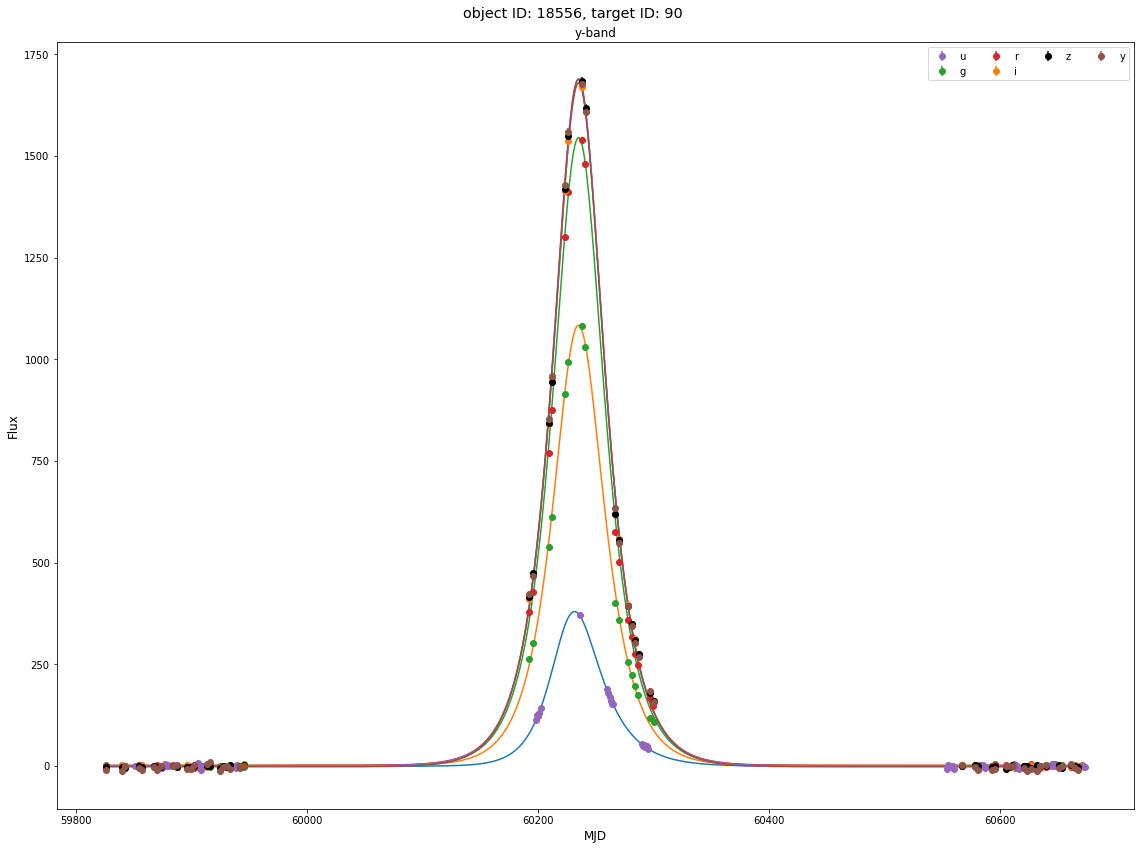

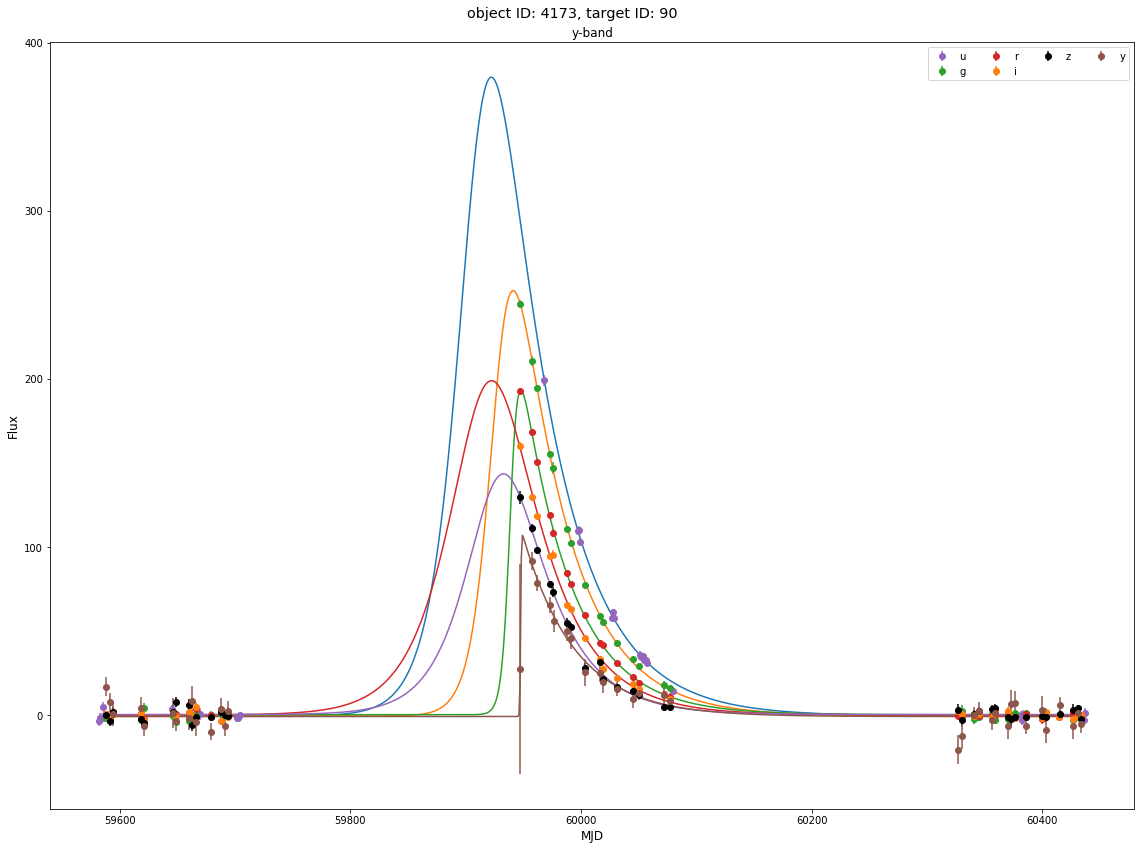

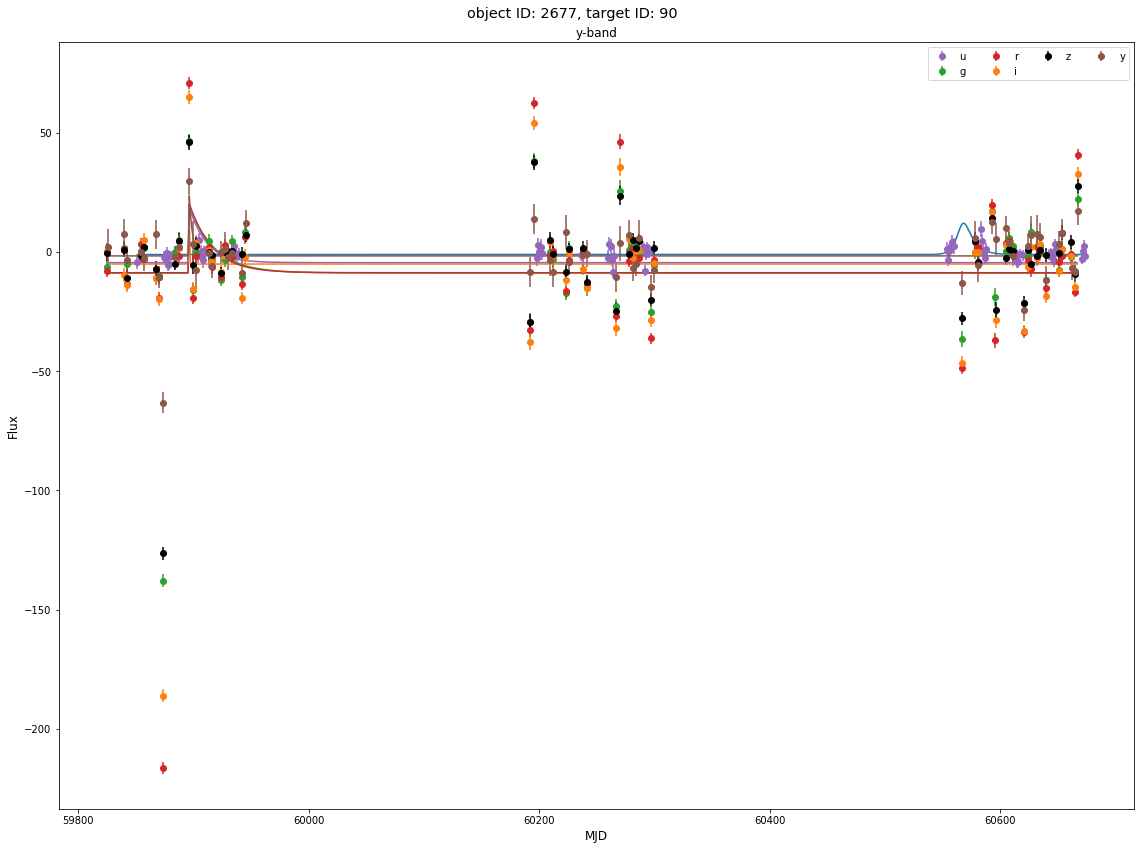

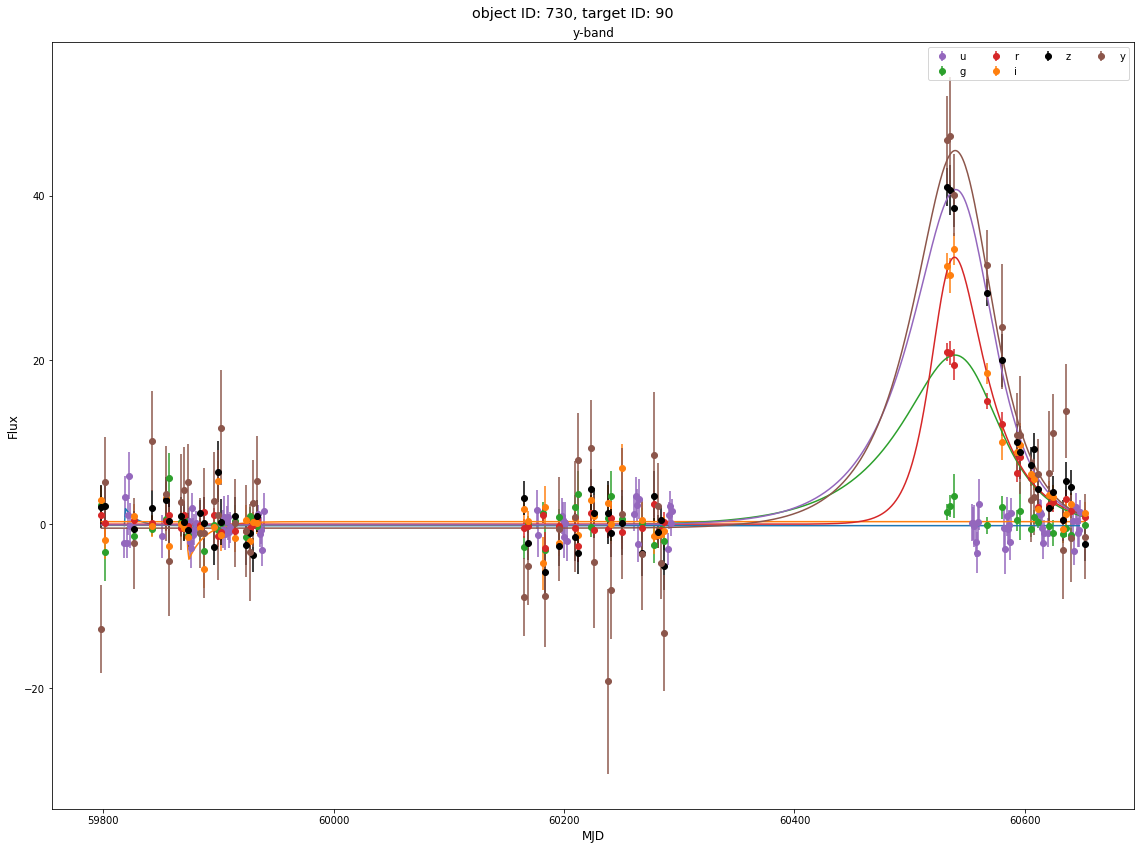

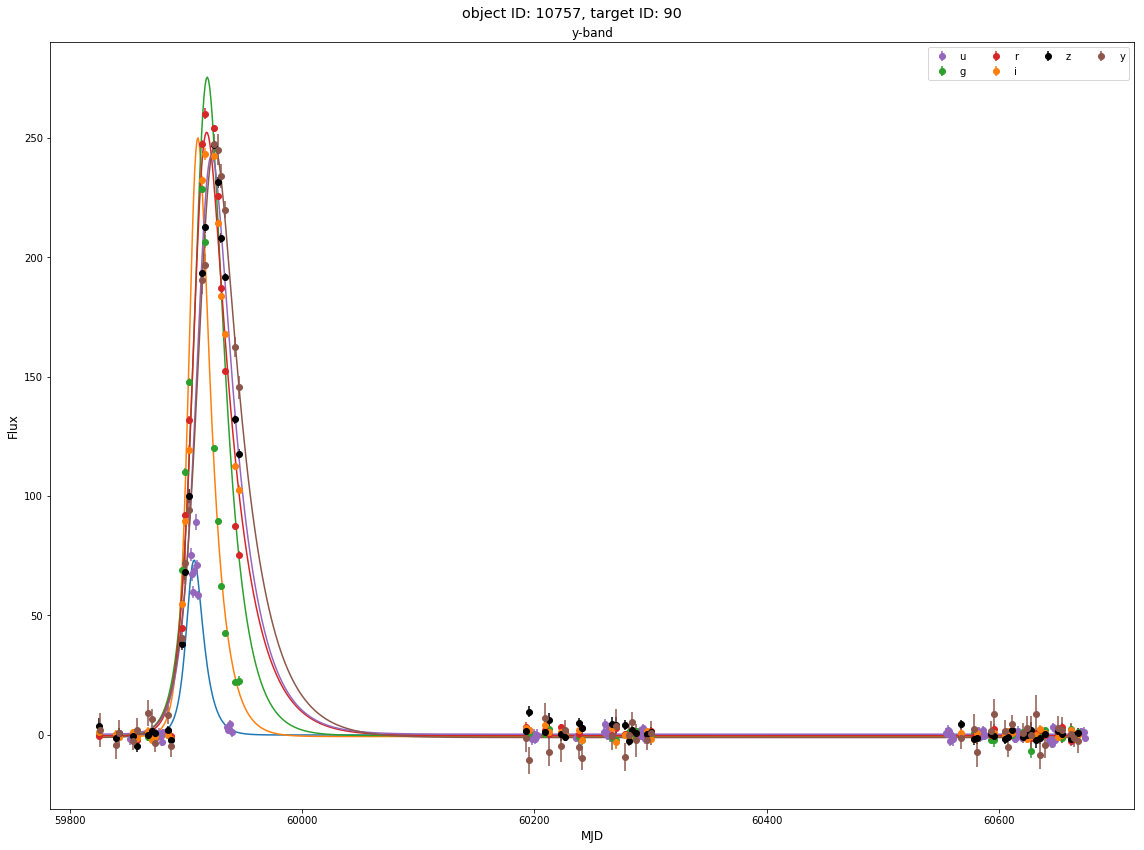

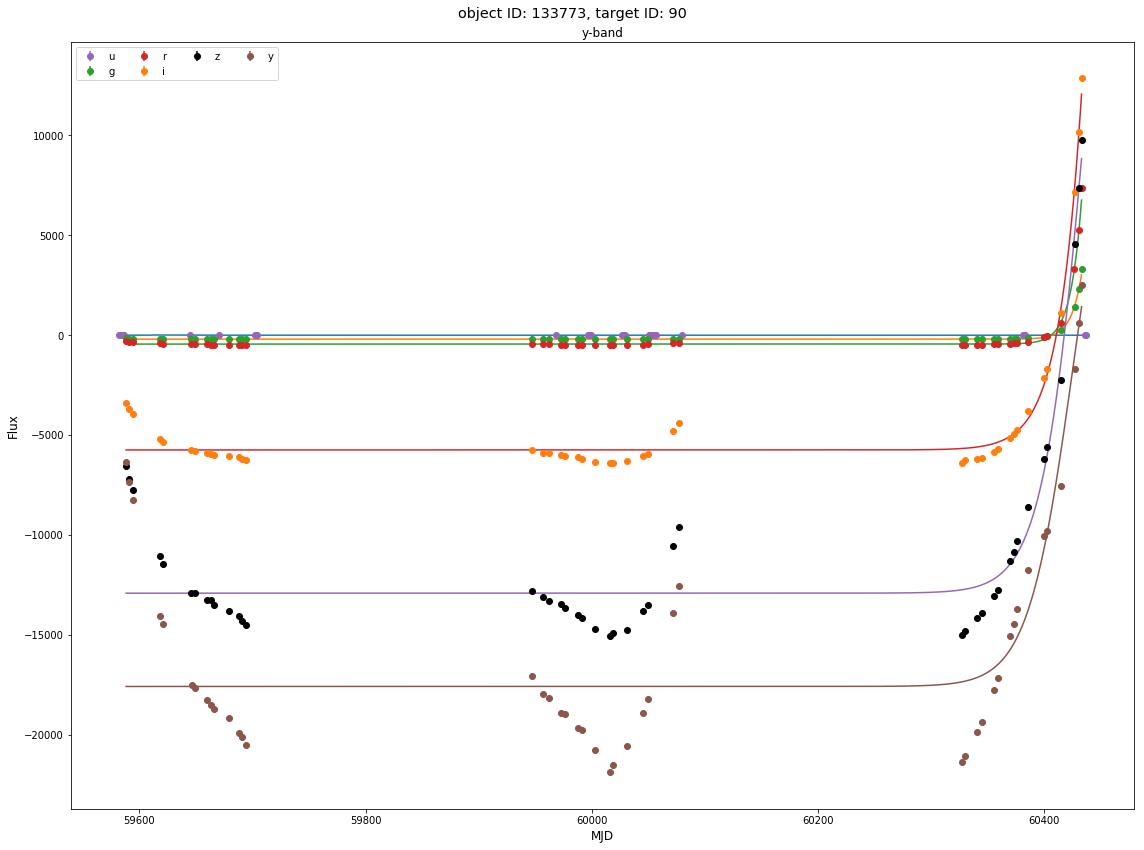

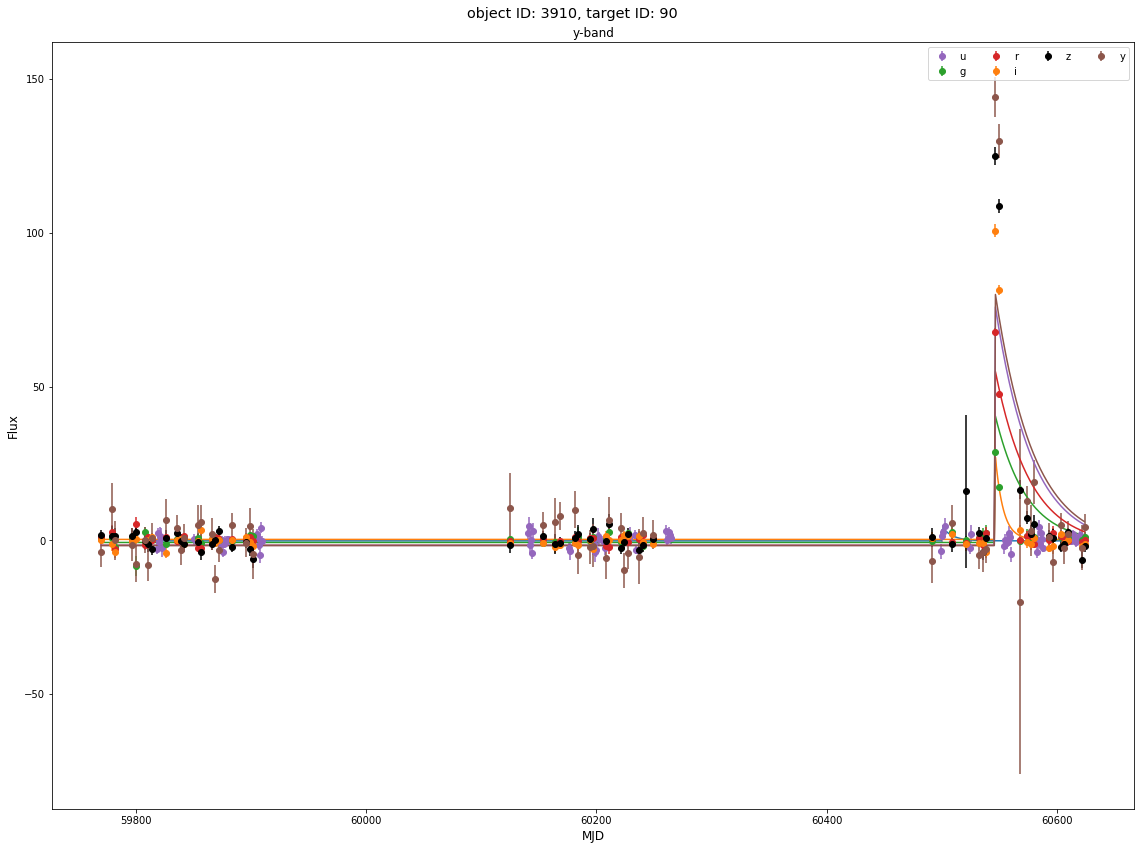

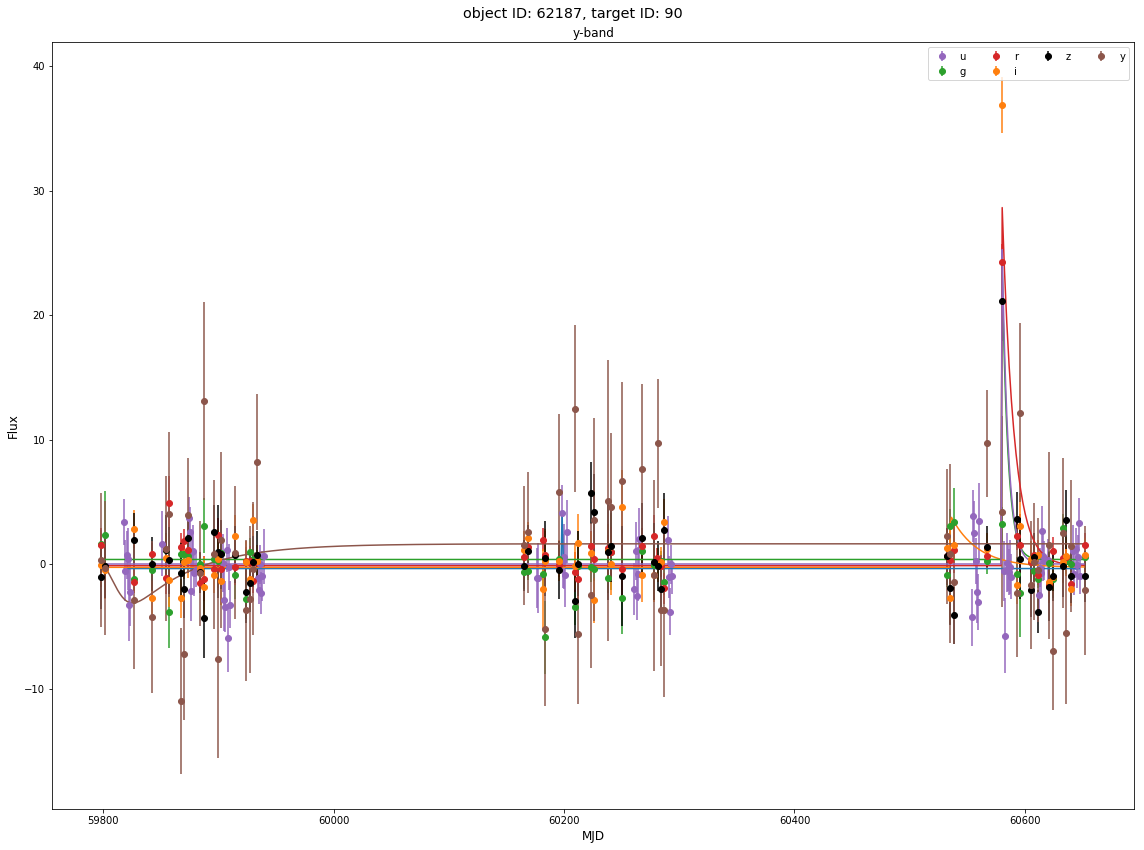

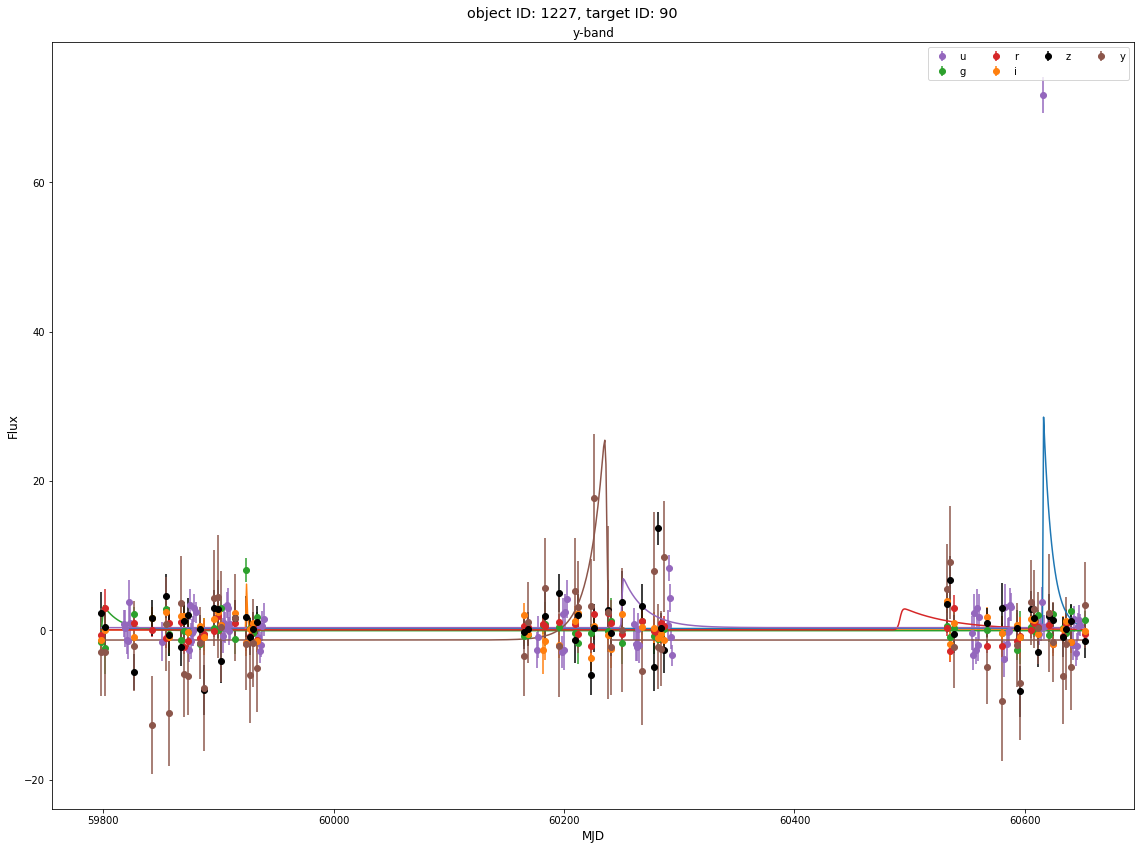

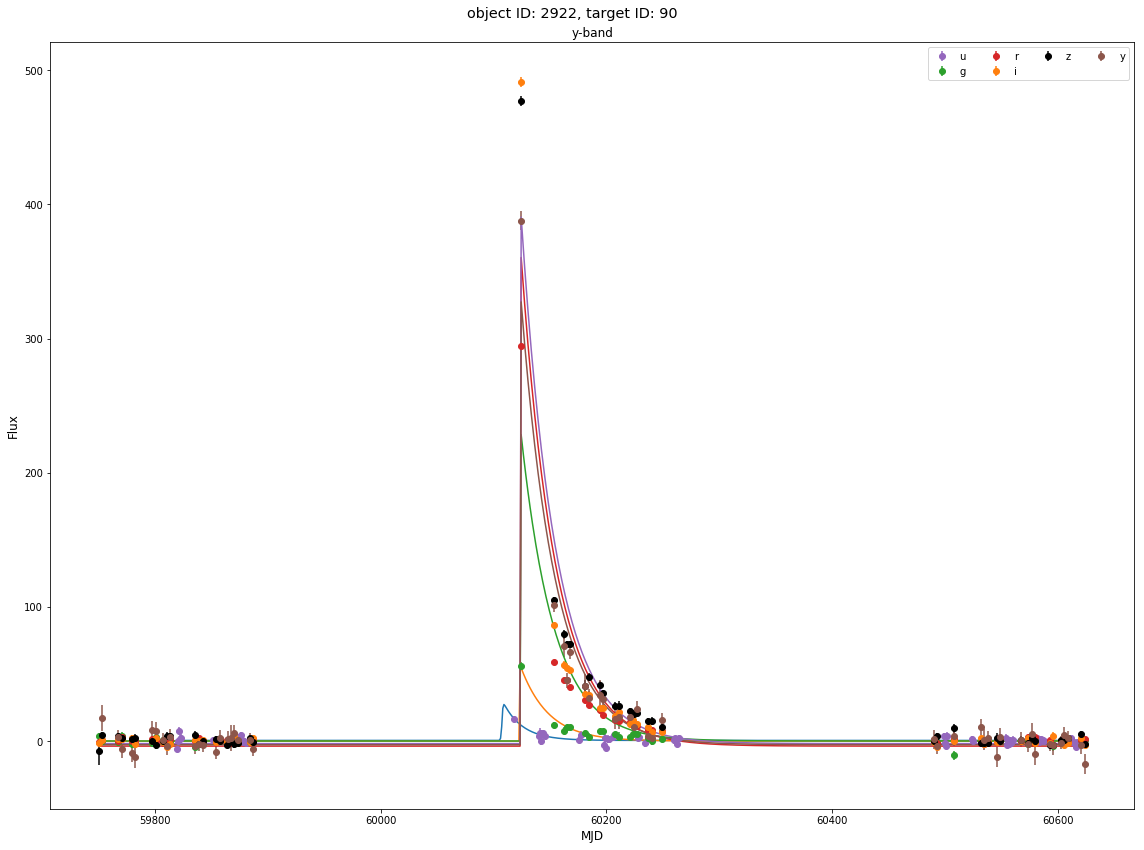

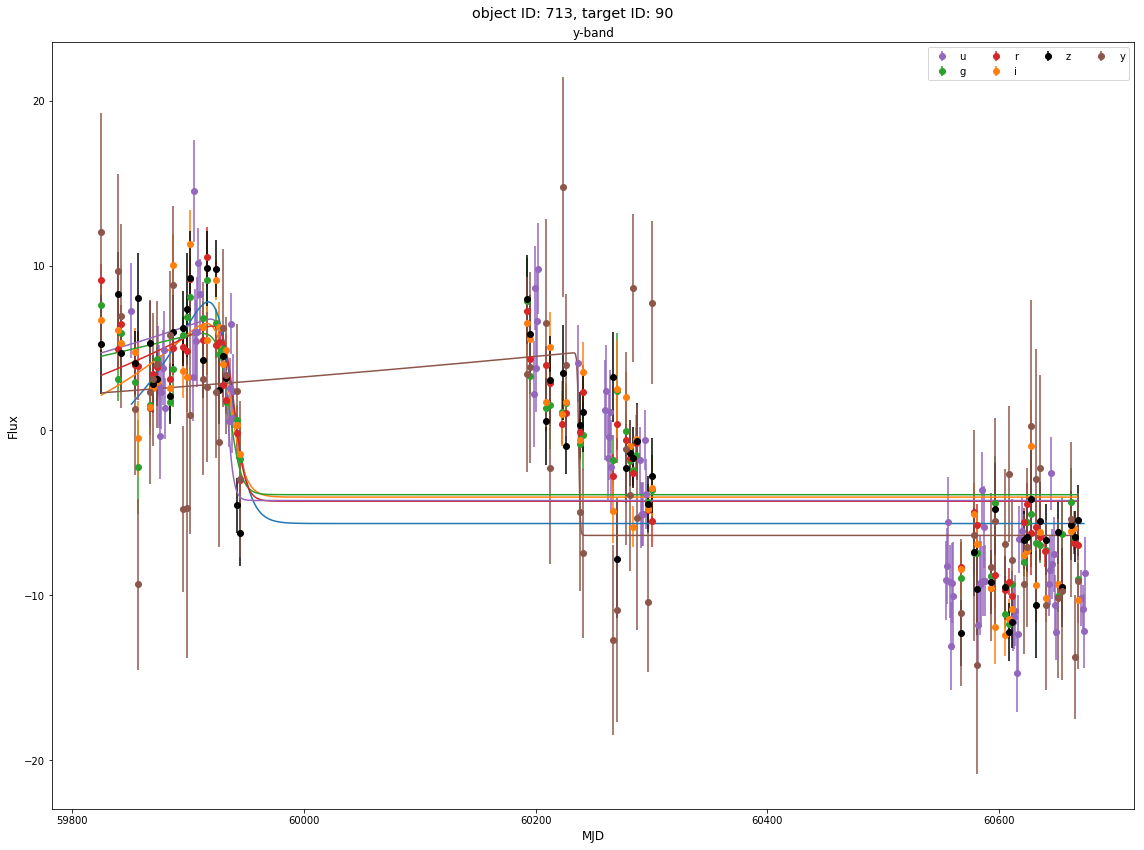

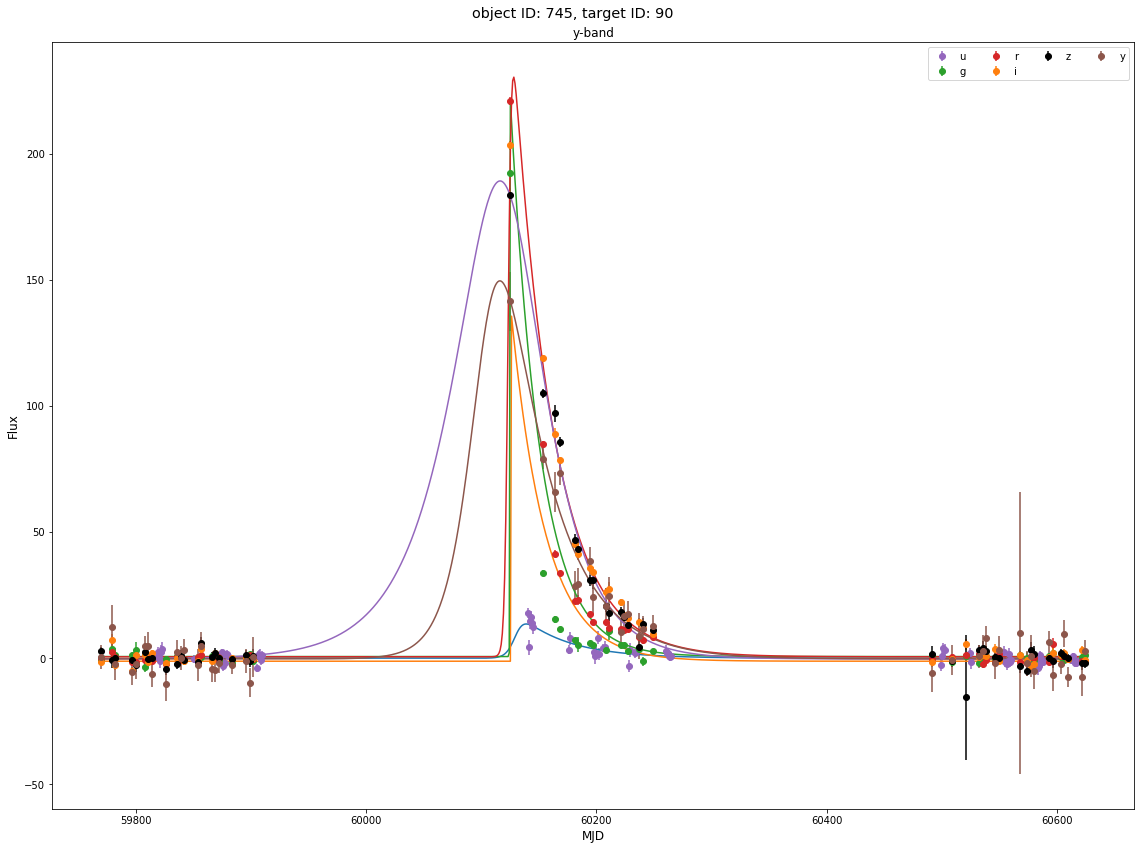

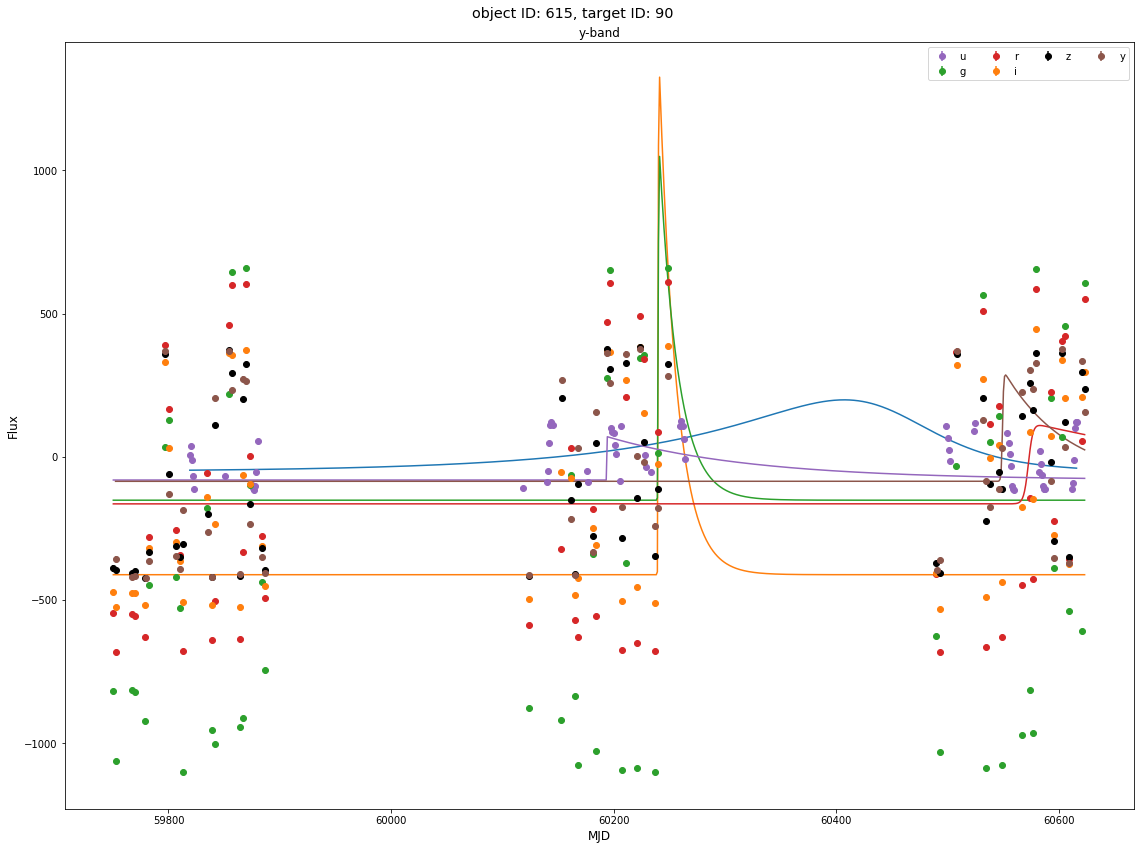

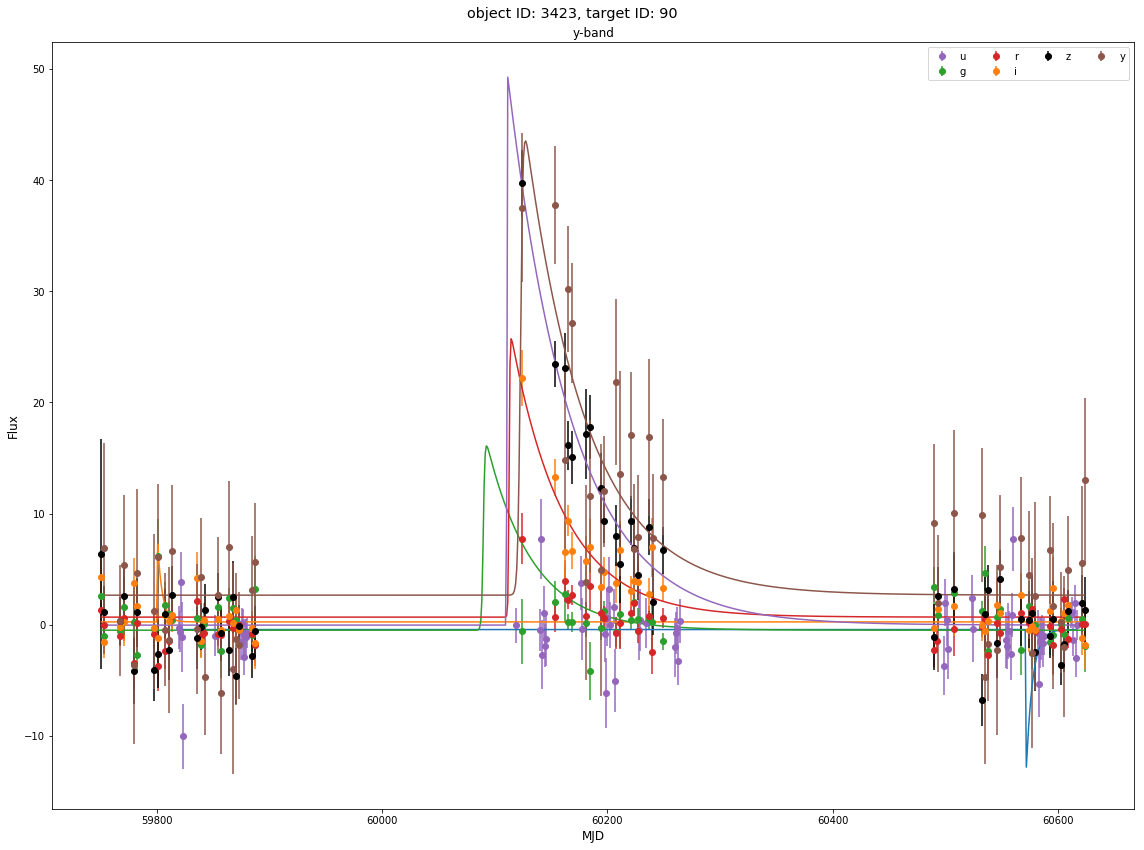

In [58]:
count = []
for i in classes:
#     how to find object which is most representative of that target
        currdata = metadata[metadata["target"] == i]
        curr_lcdata = lcdata[lcdata['object_id'] == currdata['object_id'][0]]
        curr_lc = LightCurve(curr_lcdata)
        curr_lc.plot_multicolor_lc()
        

In [31]:
highest_dist = metadata_sn['distmod'].max()
lowest = metadata_sn['distmod'].min()
print(highest_dist, lowest)

47.0227 32.8185


In [37]:
# closest
lcdata_sn1 = lcdata[lcdata['object_id'] == 121051157]

lcdata_sn1

object_id,mjd,passband,flux,flux_err,detected
int64,float64,int64,float64,float64,int64
121051157,59584.1412,0,-1.672446,10.619904,0
121051157,59588.0781,5,84.299416,32.237122,0
121051157,59589.2394,3,-1.442558,4.744076,0
121051157,59592.0903,4,-1.663104,6.980502,0
121051157,59597.0458,5,12.641462,22.057299,0
121051157,59607.0431,5,21.167715,22.068399,0
121051157,59623.0996,4,0.91506,11.209169,0
121051157,59628.0333,4,0.354143,8.343197,0
121051157,59643.0165,4,9.898069,8.827191,0


In [210]:
# farthest
lcdata_sn2 = lcdata[lcdata['object_id'] == 79309757]

lcdata_sn2

object_id,mjd,passband,flux,flux_err,detected
int64,float64,int64,float64,float64,int64
79309757,59752.3253,3,-8.058773,5.24293,0
79309757,59769.2223,4,-3.429286,6.734529,0
79309757,59770.2789,5,-10.482862,17.724758,0
79309757,59771.2446,4,13.092312,11.763175,0
79309757,59772.2487,5,-5.700124,26.354427,0
79309757,59774.3362,4,18.670275,15.33794,0
79309757,59783.196,2,2.666879,3.308868,0
79309757,59788.2824,1,1.339843,2.721422,0
79309757,59789.3087,0,-11.373791,12.869137,0


Finding optimal frequency:
 - Estimated peak width = 0.00582
 - Using 5 steps per peak; omega_step = 0.00116
 - User-specified period range:  3 to 10
 - Computing periods at 1264 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
object ID: 121051157 has a period of 3.374620805347915 days
u
g
r
i
z
y


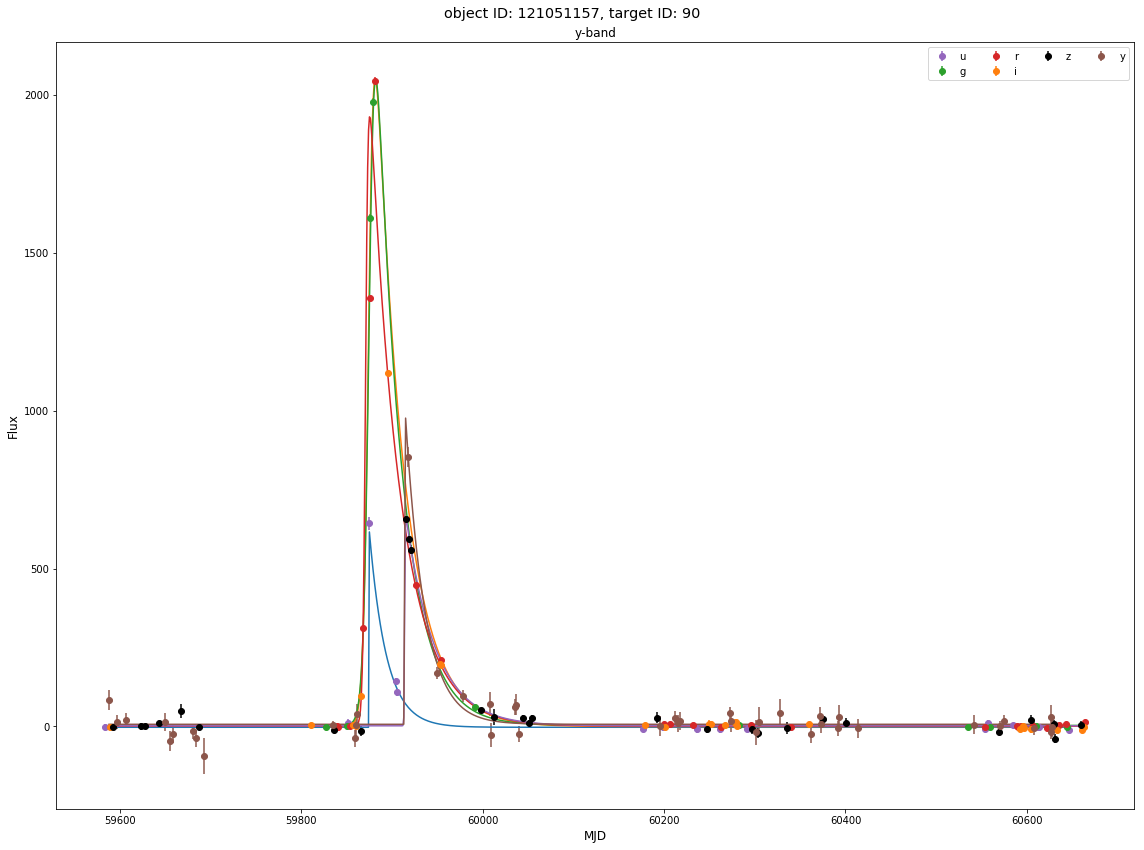

In [40]:
lc = LightCurve(lcdata_sn1)
lc.plot_multicolor_lc()

Finding optimal frequency:
 - Estimated peak width = 0.00582
 - Using 5 steps per peak; omega_step = 0.00116
 - User-specified period range:  3 to 10
 - Computing periods at 1264 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
object ID: 121051157 has a period of 3.374620805347915 days
u
g
r
i
z
y


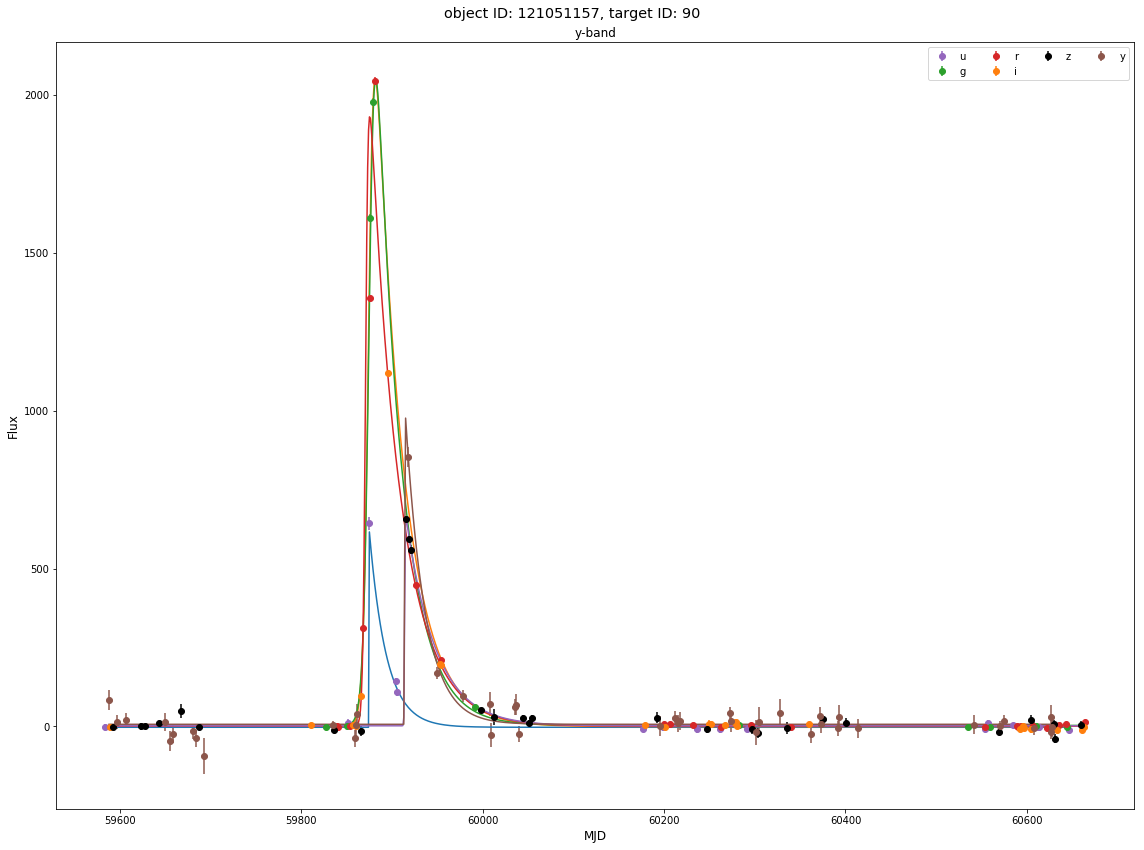

In [211]:
lc = LightCurve(lcdata_sn1)
lc.plot_multicolor_lc()

In [91]:
columns = metadata_sn['distmod']
cc = []
for i in columns:
    if i != None:
        print("found")
    cc.append(i)

# Of all the objects that are classified as possible SN none are to be found in our galaxy


found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
foun

found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
foun

In [128]:
metadata_sn[metadata_sn['mwebv'] == metadata_sn['mwebv'].min()]

object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64
4445796,61.523438,-37.732746,240.229896,-48.068081,0,0.27,0.2729,0.0243,40.7196,0.003,90


In [129]:
metadata_sn[metadata_sn['mwebv'] == metadata_sn['mwebv'].max()]

object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64
19936335,136.323532,-45.389202,267.059102,1.148089,0,0.0813,2.3492,1.0706,46.3836,1.711,90


In [65]:
metadata_sn[metadata_sn['distmod'] == metadata_sn['distmod'].min()]

object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64
121051157,80.15625,-23.806295,226.148611,-29.889414,0,0.1175,0.0085,0.0401,32.8185,0.021,90


In [64]:
metadata_sn[metadata_sn['distmod'] == metadata_sn['distmod'].max()]

object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64
79309757,335.390625,-13.401351,46.770975,-52.449741,0,0.3593,2.9961,1.123,47.0227,0.034,90


Finding optimal frequency:
 - Estimated peak width = 0.00736
 - Using 5 steps per peak; omega_step = 0.00147
 - User-specified period range:  0.1 to 10
 - Computing periods at 42260 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
object ID: 745 has a period of 0.9986820811466305 days
u
g
r
i
z
y


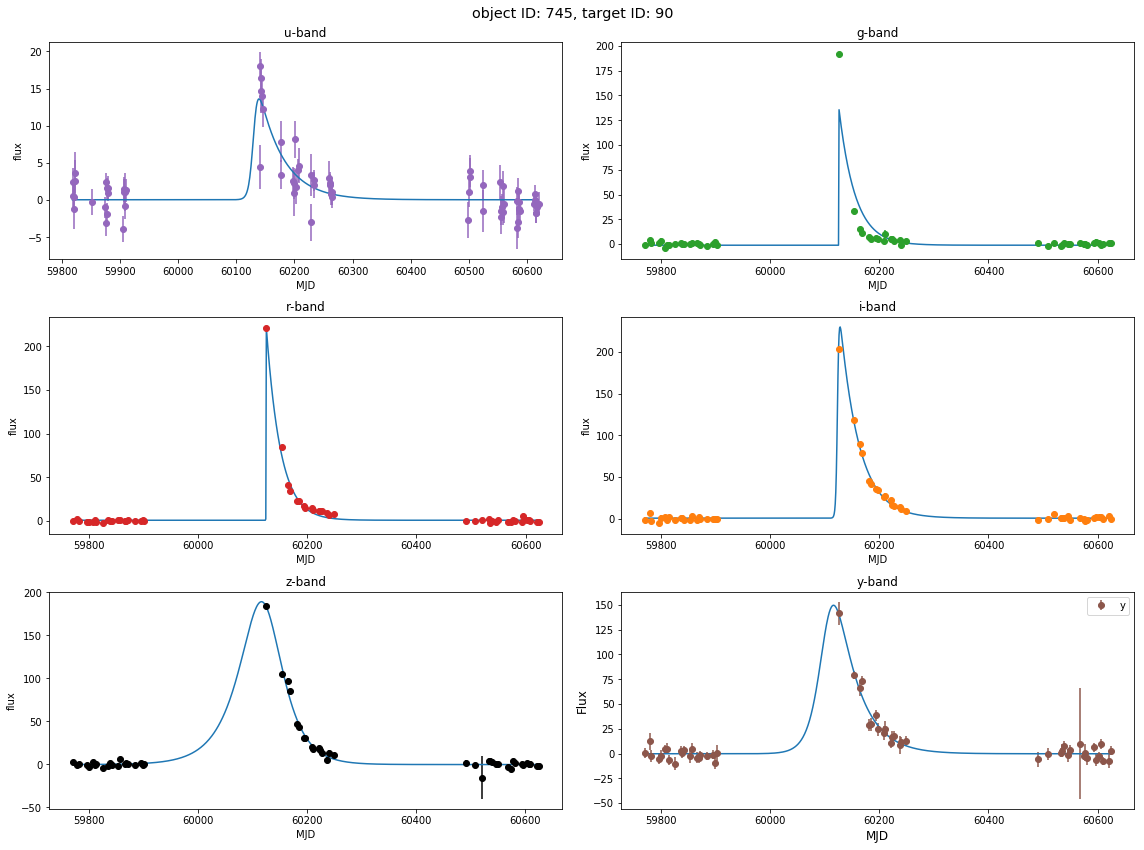

In [127]:
#  id 1124
lc = LightCurve(lcdata_sn)
lc.plot_multicolor_lc()

Finding optimal frequency:
 - Estimated peak width = 0.00582
 - Using 5 steps per peak; omega_step = 0.00116
 - User-specified period range:  3 to 10
 - Computing periods at 1264 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
object ID: 121051157 has a period of 3.374620805347915 days
u
g
r
i
z
y


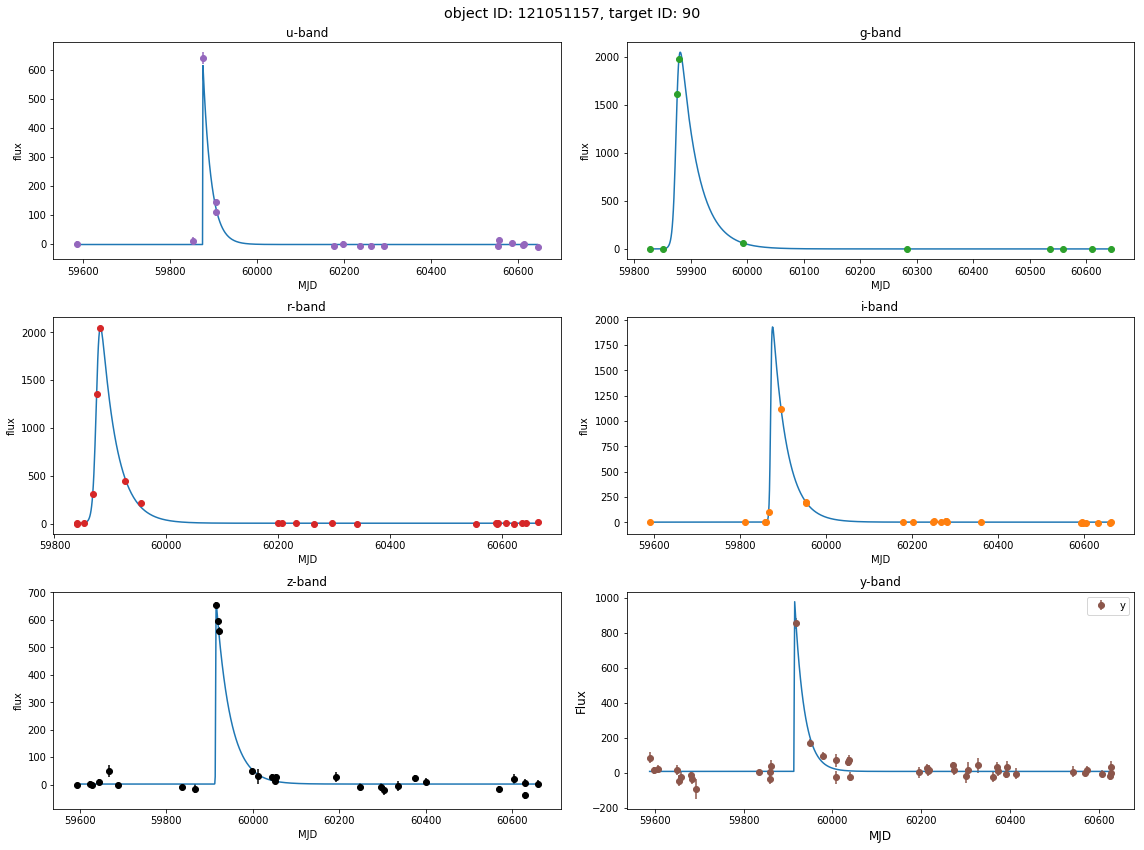

In [125]:
#  id closest
lc = LightCurve(lcdata_sn)
lc.plot_multicolor_lc()

Finding optimal frequency:
 - Estimated peak width = 0.00713
 - Using 5 steps per peak; omega_step = 0.00143
 - User-specified period range:  2.1 to 10
 - Computing periods at 1680 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
object ID: 79309757 has a period of 2.233354192517238 days
u
g
r
i
z
y


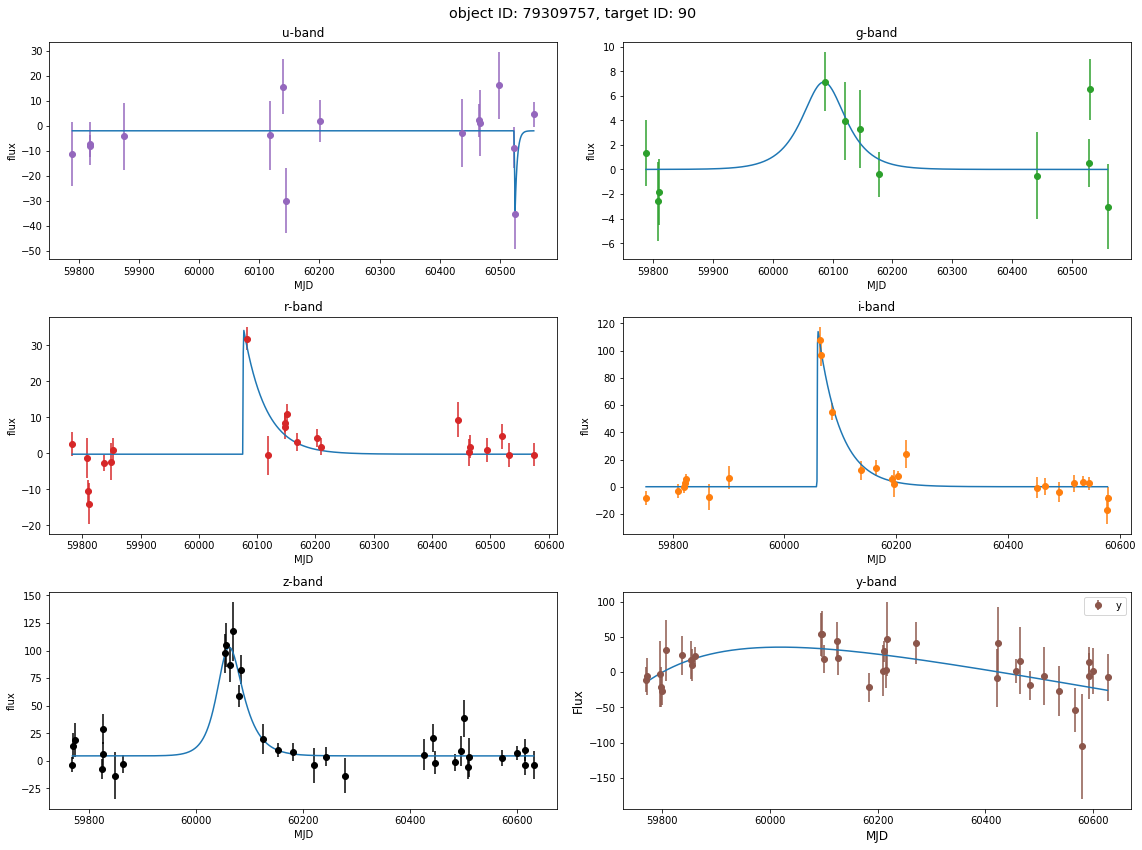

In [123]:
#  id furthest
lc = LightCurve(lcdata_sn)
lc.plot_multicolor_lc()

Finding optimal frequency:
 - Estimated peak width = 0.00576
 - Using 5 steps per peak; omega_step = 0.00115
 - User-specified period range:  3.2 to 10
 - Computing periods at 1176 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
object ID: 4445796 has a period of 3.381533140950294 days
u
g
r
i
z
y


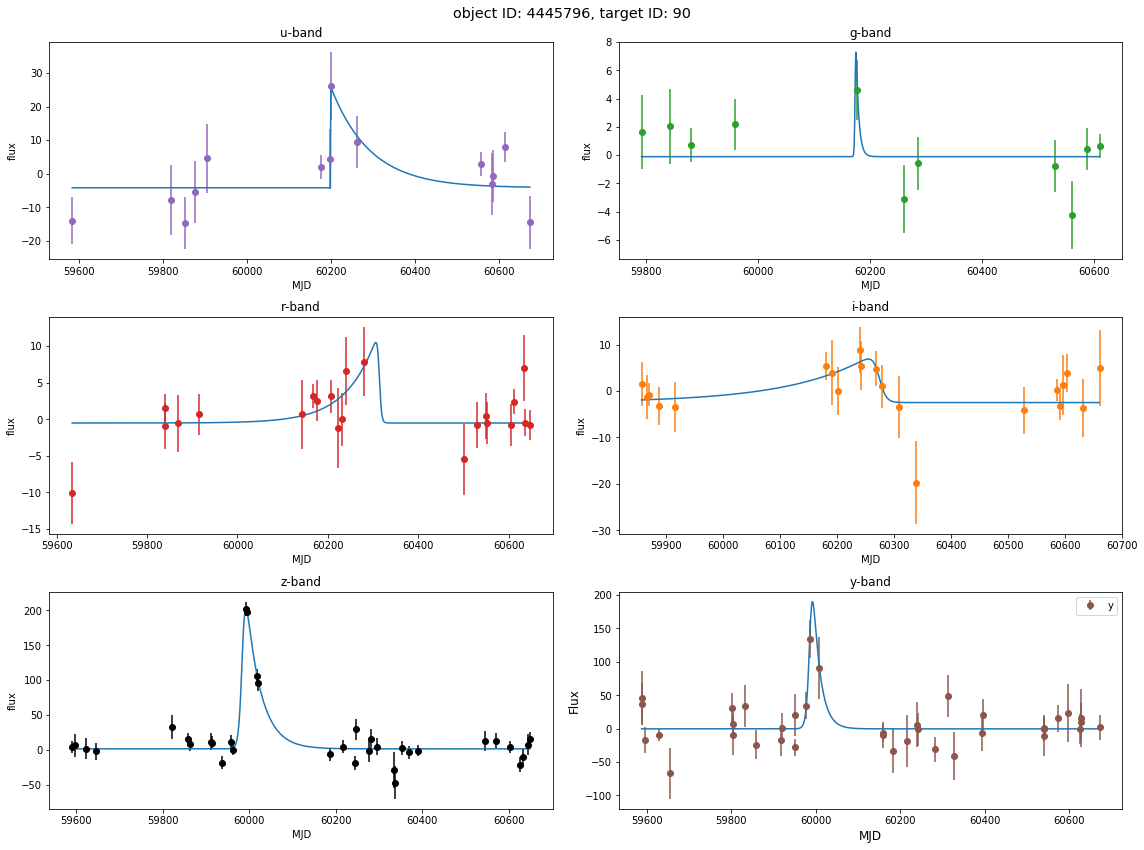

In [131]:
#  id lowest dust
lc = LightCurve(lcdata_sn)
lc.plot_multicolor_lc()

Finding optimal frequency:
 - Estimated peak width = 0.00577
 - Using 5 steps per peak; omega_step = 0.00115
 - User-specified period range:  4 to 10
 - Computing periods at 824 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
object ID: 19936335 has a period of 5.452777727606558 days
u
g
r
i
z
y


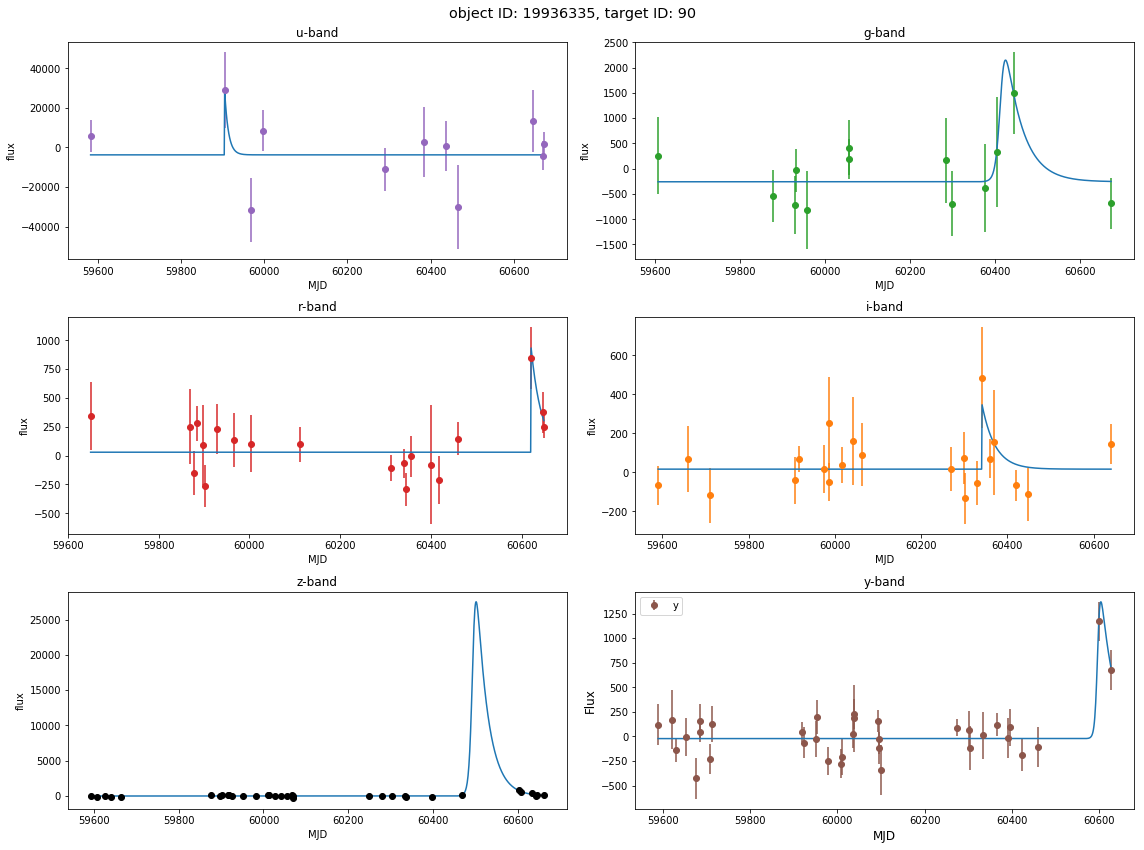

In [145]:
#  id highest dust
lc = LightCurve(lcdata_sn)
lc.plot_multicolor_lc()

Finding optimal frequency:
 - Estimated peak width = 0.00576
 - Using 5 steps per peak; omega_step = 0.00115
 - User-specified period range:  3.2 to 10
 - Computing periods at 1176 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
object ID: 4445796 has a period of 3.381533140950294 days
u
g
r
i
z
y


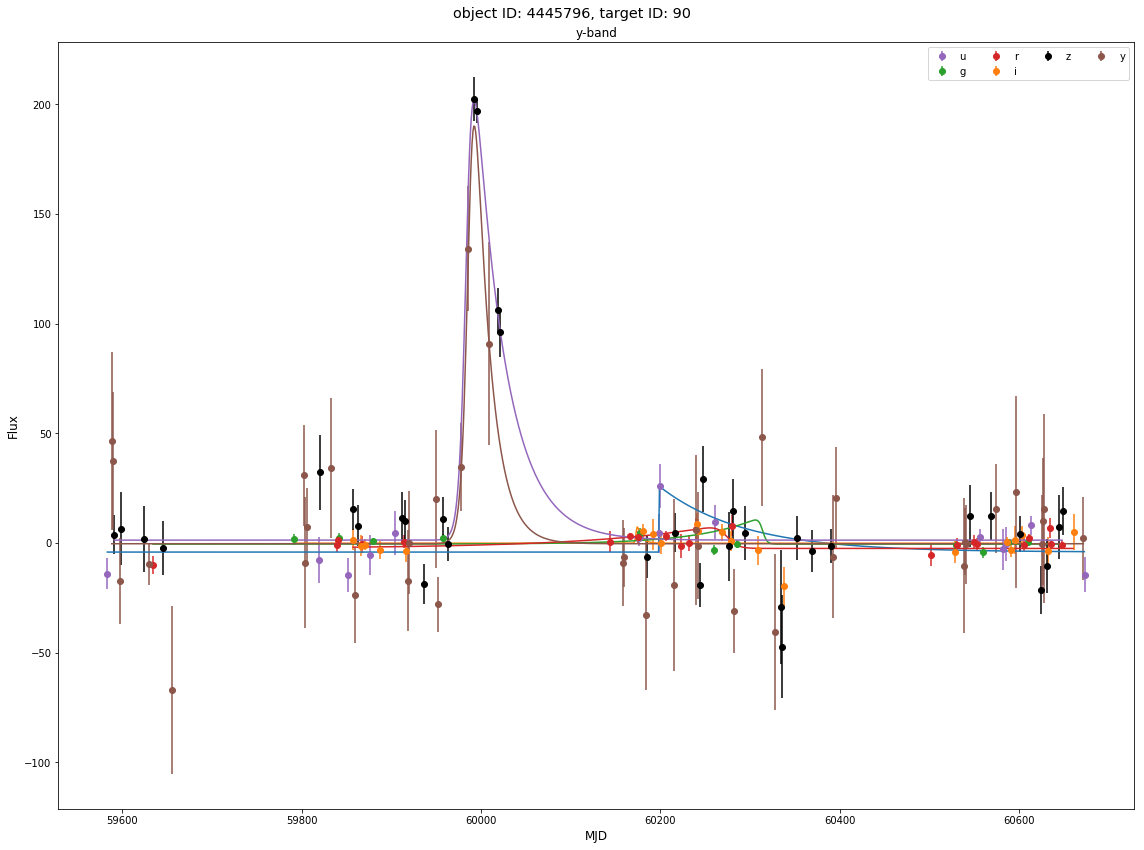

In [148]:
#  id lowest dust
lc = LightCurve(lcdata_sn)
lc.plot_multicolor_lc()

Finding optimal frequency:
 - Estimated peak width = 0.00577
 - Using 5 steps per peak; omega_step = 0.00115
 - User-specified period range:  4 to 10
 - Computing periods at 824 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
object ID: 19936335 has a period of 5.452777727606558 days
u
g
r
i
z
y


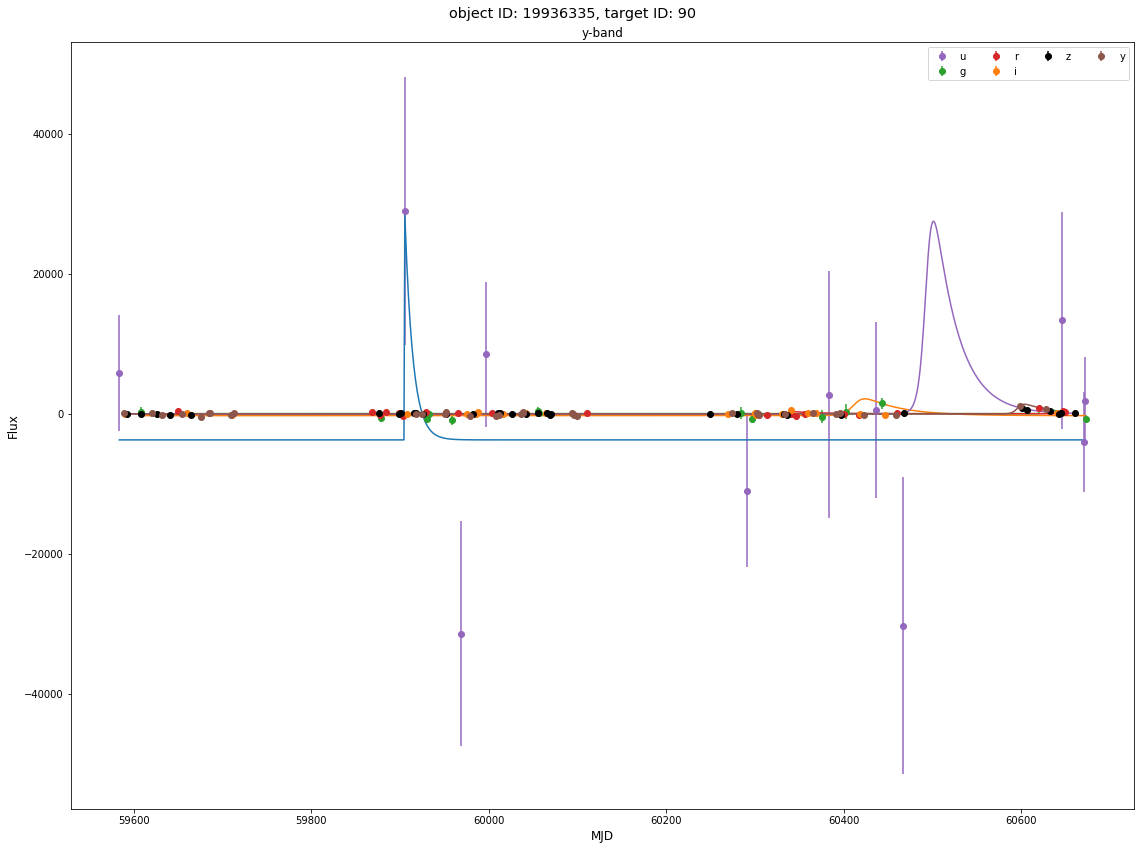

In [136]:
#  id most dust
lc = LightCurve(lcdata_sn)
lc.plot_multicolor_lc()

Finding optimal frequency:
 - Estimated peak width = 0.00582
 - Using 5 steps per peak; omega_step = 0.00116
 - User-specified period range:  3 to 10
 - Computing periods at 1264 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
object ID: 121051157 has a period of 3.374620805347915 days
u
g
r
i
z
y


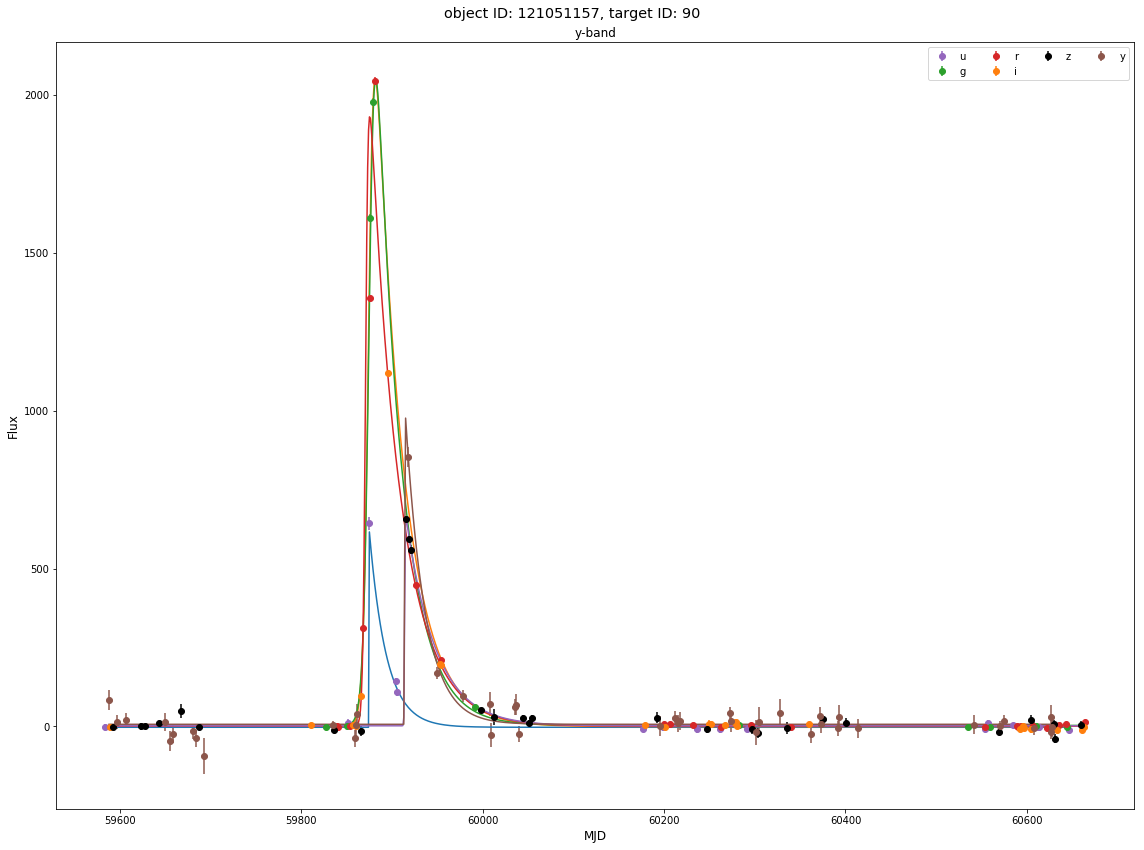

In [139]:
#   id closest
lc = LightCurve(lcdata_sn)
lc.plot_multicolor_lc()

Finding optimal frequency:
 - Estimated peak width = 0.00713
 - Using 5 steps per peak; omega_step = 0.00143
 - User-specified period range:  2.1 to 10
 - Computing periods at 1680 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
object ID: 79309757 has a period of 2.233354192517238 days
u
g
r
i
z
y


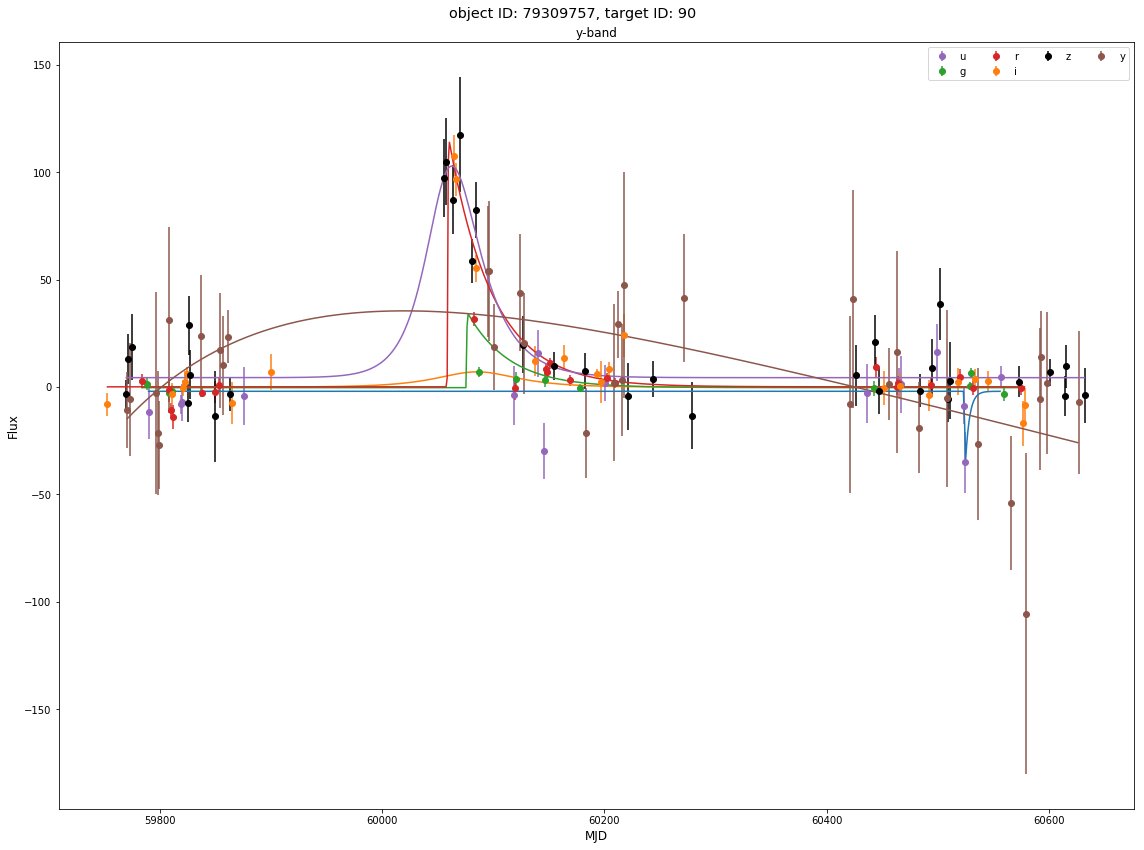

In [141]:
#   id farthest
lc = LightCurve(lcdata_sn)
lc.plot_multicolor_lc()